In [1]:
#!/usr/bin/env python
"""
Example of how to use the Reduced Order Quadrature method (see Smith et al.,
(2016) Phys. Rev. D 94, 044031) for a Binary Black hole simulated signal in
Gaussian noise.

This requires files specifying the appropriate basis weights.
These aren't shipped with Bilby, but are available on LDG clusters and
from the public repository https://git.ligo.org/lscsoft/ROQ_data.
"""
from __future__ import division, print_function

import numpy as np

import bilby

outdir = 'outdir'
label = 'roq'

In [2]:
# The ROQ bases can be given an overall scaling.
# Note how this is applied to durations, frequencies and masses.
scale_factor = 1.6

# Load in the pieces for the linear part of the ROQ. Note you will need to
# adjust the filenames here to the correct paths on your machine
basis_matrix_linear = np.load("B_linear.npy").T
freq_nodes_linear = np.load("fnodes_linear.npy") * scale_factor

# Load in the pieces for the quadratic part of the ROQ
basis_matrix_quadratic = np.load("B_quadratic.npy").T
freq_nodes_quadratic = np.load("fnodes_quadratic.npy") * scale_factor

# Load the parameters describing the valid parameters for the basis.
# params = np.genfromtxt("/Users/hxc/Downloads/ROQ_data-master/IMRPhenomPv2/4s/params.dat", names=True)
params = np.genfromtxt("params.dat", names=True)
params['flow'] *= scale_factor
params['fhigh'] *= scale_factor
params['seglen'] /= scale_factor
params['chirpmassmin'] /= scale_factor
params['chirpmassmax'] /= scale_factor
params['compmin'] /= scale_factor

In [3]:
np.random.seed(170808)

duration = 4 / scale_factor
sampling_frequency = 2048 * scale_factor

injection_parameters = dict(
    mass_1=36.0, mass_2=29.0, a_1=0.4, a_2=0.3, tilt_1=0.0, tilt_2=0.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=1000., theta_jn=0.4, psi=0.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=20. * scale_factor,
                          minimum_frequency=20. * scale_factor)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)

print(len(waveform_generator.frequency_array))
print(len(waveform_generator.time_array))

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
# ifos.set_strain_data_from_power_spectral_density(
#     sampling_frequency=sampling_frequency, duration=duration,
#     start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

# print(bilby.gw.source.lal_binary_black_hole(
#         frequency_array, 36.0, 29.0, 1000, 0.4, 0.0,
#         1.7, 0.3, 0.0, 0.3, 0.4, 1.3))

# print(bilby.gw.source._base_lal_cbc_fd_waveform.hplus)

17:57 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259642.413.
17:57 bilby INFO    : Injected signal in H1:
17:57 bilby INFO    :   optimal SNR = 22.85
17:57 bilby INFO    :   matched filter SNR = 22.85+0.00j
17:57 bilby INFO    :   mass_1 = 36.0
17:57 bilby INFO    :   mass_2 = 29.0
17:57 bilby INFO    :   a_1 = 0.4
17:57 bilby INFO    :   a_2 = 0.3
17:57 bilby INFO    :   tilt_1 = 0.0
17:57 bilby INFO    :   tilt_2 = 0.0
17:57 bilby INFO    :   phi_12 = 1.7
17:57 bilby INFO    :   phi_jl = 0.3
17:57 bilby INFO    :   luminosity_distance = 1000.0
17:57 bilby INFO    :   theta_jn = 0.4
17:57 bilby INFO    :   psi = 0.659
17:57 bilby INFO    :   phase = 1.3
17:57 bilby INFO    :   geocent_time = 1126259642.413
17:57 bilby INFO    :   ra = 1.375
17:57 bilby INFO    :   dec = -1.2108
17:57 bilby WARNING : Injecting signal outside segment, start_time=1126259639.413, merger time=1126259642.413.
17:57 bilby INFO    : Injected signal in L1:
17:5

4097
8192


[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [4]:
# make ROQ waveform generator
search_waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.binary_black_hole_roq,
    waveform_arguments=dict(
        frequency_nodes_linear=freq_nodes_linear,
        frequency_nodes_quadratic=freq_nodes_quadratic,
        reference_frequency=20. * scale_factor, waveform_approximant='IMRPhenomPv2'),
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters)

# Here we add constraints on chirp mass and mass ratio to the prior, these are
# determined by the domain of validity of the ROQ basis.
priors = bilby.gw.prior.BBHPriorDict()
for key in ['a_1', 'a_2', 'tilt_1', 'tilt_2', 'theta_jn', 'phase', 'psi', 'ra',
            'dec', 'phi_12', 'phi_jl', 'luminosity_distance']:
    priors[key] = injection_parameters[key]
for key in ['mass_1', 'mass_2']:
    priors[key].minimum = max(priors[key].minimum, params['compmin'])
priors['chirp_mass'] = bilby.core.prior.Constraint(
    name='chirp_mass', minimum=float(params['chirpmassmin']),
    maximum=float(params['chirpmassmax']))
priors['mass_ratio'] = bilby.core.prior.Constraint(0.125, 1, name='mass_ratio')
priors['geocent_time'] = bilby.core.prior.Uniform(
    injection_parameters['geocent_time'] - 0.1,
    injection_parameters['geocent_time'] + 0.1, latex_label='$t_c$', unit='s')


17:57 bilby INFO    : No prior given, using default BBH priors in /home/xinchun.hu/.conda/envs/myenv/lib/python3.7/site-packages/bilby/gw/prior_files/binary_black_holes.prior.


17:57 bilby WARNING : The waveform_generator start_time is not equal to that of the provided interferometers. Overwriting the waveform_generator.
17:57 bilby INFO    : ROQ time-step = 0.00013659470790314336
17:57 bilby INFO    : Using 1786 ROQ time samples
17:57 bilby INFO    : Building ROQ weights for H1 with 4017 frequencies between 32.0 and 1638.4.
17:57 bilby INFO    : Finished building weights for H1
17:57 bilby INFO    : Building ROQ weights for L1 with 4017 frequencies between 32.0 and 1638.4.
17:57 bilby INFO    : Finished building weights for L1
17:57 bilby INFO    : Building ROQ weights for V1 with 4017 frequencies between 32.0 and 1638.4.
17:57 bilby INFO    : Finished building weights for V1
17:57 bilby INFO    : Saving ROQ weights to weights.json.npz
17:57 bilby INFO    : Loading ROQ weights from weights.json.npz
17:57 bilby INFO    : Running for label 'roq', output will be saved to 'outdir'
17:57 bilby INFO    : Using LAL version Branch: None;Tag: lalsuite-v6.62;Id: a75e6

0it [00:00, ?it/s]

17:57 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1024, 'first_update': None, 'walks': 30, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 2.0, 'facc': 0.5, 'slices': 5, 'update_interval': 614, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x2b68ceb80ef0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None}
17:57 bilby INFO    : Checkpoint every n_check_point = 2000000
17:57 bilby INFO    : Using dynesty version 1.0.0
17:58 bilby INFO    : Reading resume file outdir/roq_resume.pickle
17:58 bilby INFO    

19133it [00:04, 3850.36it/s, bound:0 ncall:573970 eff:3.5% logz-ratio=606.81+/-0.17 dlogz:0.000>0.10]



17:58 bilby INFO    : Sampling time: 0:19:54.872313
17:58 bilby INFO    : Summary of results:
nsamples: 20157
log_noise_evidence: -623.148
log_evidence: -16.339 +/-  0.172
log_bayes_factor: 606.809 +/-  0.172



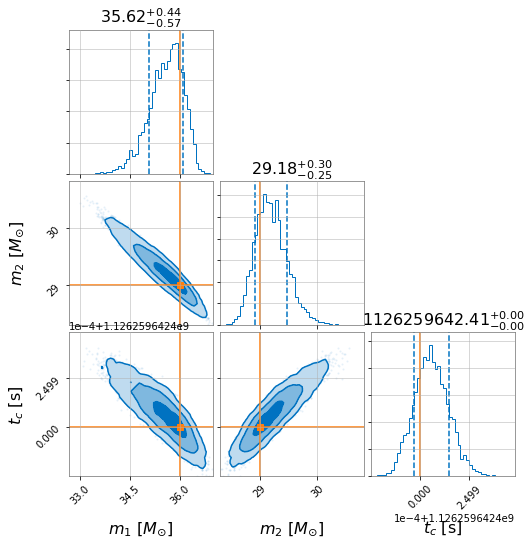

In [5]:
likelihood = bilby.gw.likelihood.ROQGravitationalWaveTransient(
    interferometers=ifos, waveform_generator=search_waveform_generator,
    linear_matrix=basis_matrix_linear, quadratic_matrix=basis_matrix_quadratic,
    priors=priors, roq_params=params)

# write the weights to file so they can be loaded multiple times
likelihood.save_weights('weights.json')

# remove the basis matrices as these are big for longer bases
del basis_matrix_linear, basis_matrix_quadratic

# load the weights from the file
likelihood = bilby.gw.likelihood.ROQGravitationalWaveTransient(
    interferometers=ifos, waveform_generator=search_waveform_generator,
    weights='weights.json.npz', priors=priors)

result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=1024,
    injection_parameters=injection_parameters, outdir=outdir, label=label)

# Make a corner plot.
result.plot_corner()
